## Readings:

1. Gene Genealogies, Variation and Evolution (Hein et al.)
- 1.1
- 1.4
* 1.7
* 1.8
* 1.9
* 2.1.2
* 2.5.1
* You could read the rest of first two chapters too.
2. What is SFS: https://en.wikipedia.org/wiki/Allele_frequency_spectrum
3. Demographic Inference: http://evomics.org/wp-content/uploads/2016/02/160129-1-Demography.pdf

# Exercise:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def coalesce(lineages):
    # Coalesces 2 lineages and returns the new lineages.
    k = len(lineages)
    i = np.random.choice(k, 2, replace = False) # randomly choose 2 lineages
    i.sort()
    i0, i1 = i
    l1 = lineages.pop(i1) # remove the lineage 1
    l0 = lineages.pop(i0) # remove the lineage 0
    new_lineage = l1+l0 # lump two lineages
    lineages.append(new_lineage) # attach the new lumped lineage
    return lineages

def mutate(lineages):
    # Mutates one of the lineages randomly
    k = len(lineages)
    i = np.random.choice(k)
    return lineages[i]

### Coalescent example

In [3]:
np.random.seed(42) # for reproducibility
lineages = [[0], [1,2], [3,4]]
coalesce(lineages)

[[3, 4], [1, 2, 0]]

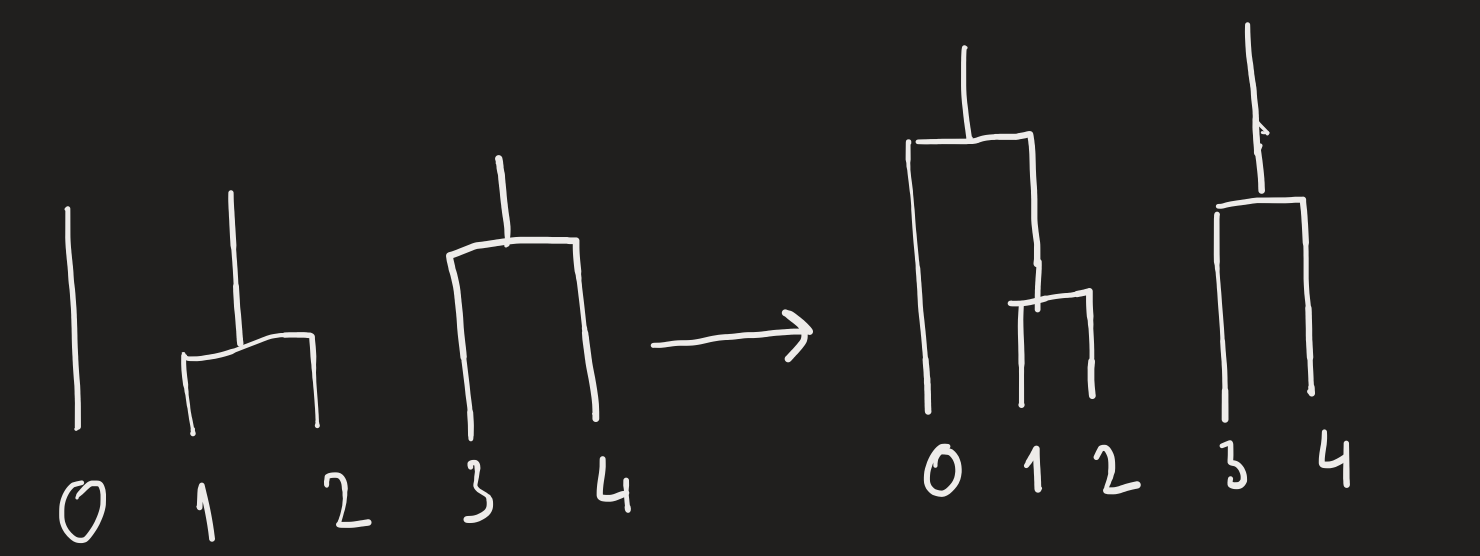

### Mutation example

In [4]:
np.random.seed(42) # for reproducibility
mutate([[0,1,2], [3,4]])

[0, 1, 2]

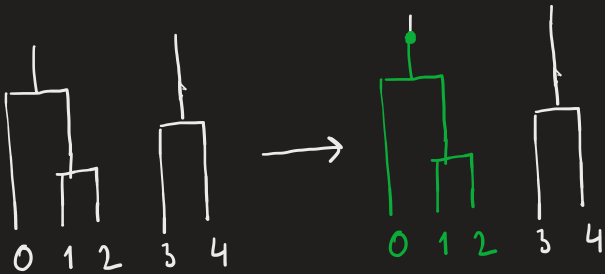

## Simulation

See Hein et al page 41 (Algorithm 2)

In [5]:
def simulate_single_pop(n, THETA):
    # Returns mutation dictionary and inter coalscent times (waiting time between coalecent events)
    # see Hein et al page 41 (Algorithm 2)
    # n: int (sample size)
    # THETA: float (mutation rate)
    
    lineages = [[i] for i in range(n)] # All lineages have their on group [[0], [1], ..., [n-1]]
    mutations = {} # Keep mutations in a dictionary
    inter_coalescent_times = [] # Waiting times for each coalescence event
    
    m = 0
    k = n
    t = 0
    while(k>1): # Step 6
        # Step 2:
        l = k*(k - 1 + THETA)/2
        t += np.random.exponential(scale=1/l)

        # Step 3:
        prob_coal = (k - 1)/(k - 1 + THETA)
        prob_mut = THETA / (k - 1 + THETA)
        u = np.random.rand()
        if u<prob_coal:
            # Step 4:
            k = k - 1
            lineages = coalesce(lineages)
            inter_coalescent_times.append(t)
            t = 0
        else:
            # Step 5:
            mutations[m] = mutate(lineages)
            m += 1
    
    return mutations, inter_coalescent_times

In [6]:
np.random.seed(108)
n = 5
THETA = 0.01

nsites = 100000 # number of independent sites

number_of_mutants = []

for _ in range(nsites):
    mutations, inter_coalescent_times = simulate_single_pop(n, THETA)
    number_of_mutations = len(mutations)
    
    if number_of_mutations == 0:
        # If there are no mutations, there are no mutants too.  
        number_of_mutants.append(0)
    elif number_of_mutations == 1:
        # Add the number of mutants 
        number_of_mutants.append(len(mutations[0]))
    else:
        # If there are more than 1 mutation we will discard this. Since it is against the infinite sites assumptions.
        pass        

In [7]:
sfs = np.bincount(number_of_mutants)
sfs = sfs/sfs.sum()
esfs = THETA/np.arange(1, n)

Text(0.5, 1.0, 'Site Frequency Spectrum')

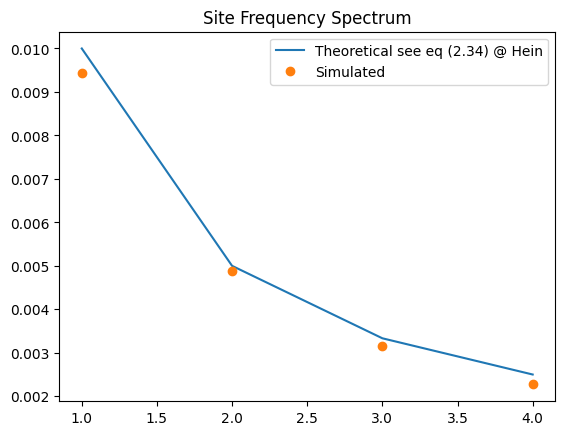

In [9]:
plt.plot(range(1, n), esfs, label = 'Theoretical see eq (2.34) @ Hein')
plt.plot(range(1, n), sfs[1:], 'o', label = 'Simulated')
plt.legend()
plt.title('Site Frequency Spectrum')